For K means clustering algorithm, I will be using [`Credit Cards Dataset for Clustering`](https://www.kaggle.com/arjunbhasin2013/ccdata) from Kaggle.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

### Data preprocessing

In [2]:
credit_data = pd.read_csv('/home/lenovo/workspace/private/data/CC GENERAL.csv')

In [3]:
credit_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### A. Check for missing data

In [5]:
credit_data.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We can see that some missing values in column `MINIMUM_PAYMENTS` column. Since we are focusing on algorithm aspect in this tutorial, I will simply remove entries having 'NaN' value.

#### B. Remove 'NaN' entries

In [9]:
credit_data = credit_data.dropna(how='any')

#### C. Remove nonrelevant column/feature

In [11]:
# Customer ID does not bear any meaning to build cluster. So, let's remove it.
credit_data.drop("CUST_ID", axis=1, inplace=True)

<!-- TEASER_END -->

In [14]:
credit_data.values.shape

(8636, 17)

### K Means Implementation

In [126]:
class KMeans:
    def __init__(self, data, K):
        """
        :data: input data matrix, numpy array
        :K: Number of clusters, int
        """
        self.data = data
        self.K = K
        self.centroids = None
        self.labels = None
        
        self.input_size = self.data.shape
        
        self.prepare_random_centroids()

    def prepare_random_centroids(self):
        """
        Randomly initialize initial K centroids. This defines the clusters.
        """
        self.centroids = self.data[np.random.choice(self.input_size[0], self.K, replace=False)]

    def assign_labels(self):
        """
        Assign each input xi to nearest cluster.
        """
        # prepare empty distance matrix : distance between each input and centroids
        distance_matrix = np.zeros((self.input_size[0], self.K))
        # Measure the distance between each input xi and each centroids
        for i in range(self.K):
            # for each row on matrix ->self.data compute distance to centroid.
            distance_matrix[:, i] = np.linalg.norm(self.data - self.centroids[i], axis=1)
        # Assign labels to input data based on minimum distance value
        # Assigning labels means assigning centroid to each data point
       
        self.labels = np.argmin(distance_matrix, axis=1)
    
    def update_centroids(self):
        """
        Based on labels, we update centroids / compute cluster centers based on mean of all inputs for a given cluster.
        """
        for i in range(self.K):
            # Let's calculate the mean for each cluster and update the centroids
            # operation along vertical in matrix (axis=0)
            self.centroids[i] = np.mean(self.data[self.labels == i], axis=0)
    
    def train(self):
        """
        Training of k-means until convergence.
        """
        old_centroids = np.zeros(self.centroids.shape)
        while not self.check_convergence(old_centroids, self.centroids):
            # B[:]=A makes a copy and B=A creates a reference
            old_centroids[:] = self.centroids
            # label assignments
            self.assign_labels()
            
            # centroids update
            self.update_centroids()
        
    @staticmethod
    def check_convergence(old_centroid, new_centroid):
        """
        Checks if two centroids are same.
        """
        return (old_centroid==new_centroid).all()
        
        
        

In [127]:
k_means = KMeans(credit_data.values, 10)

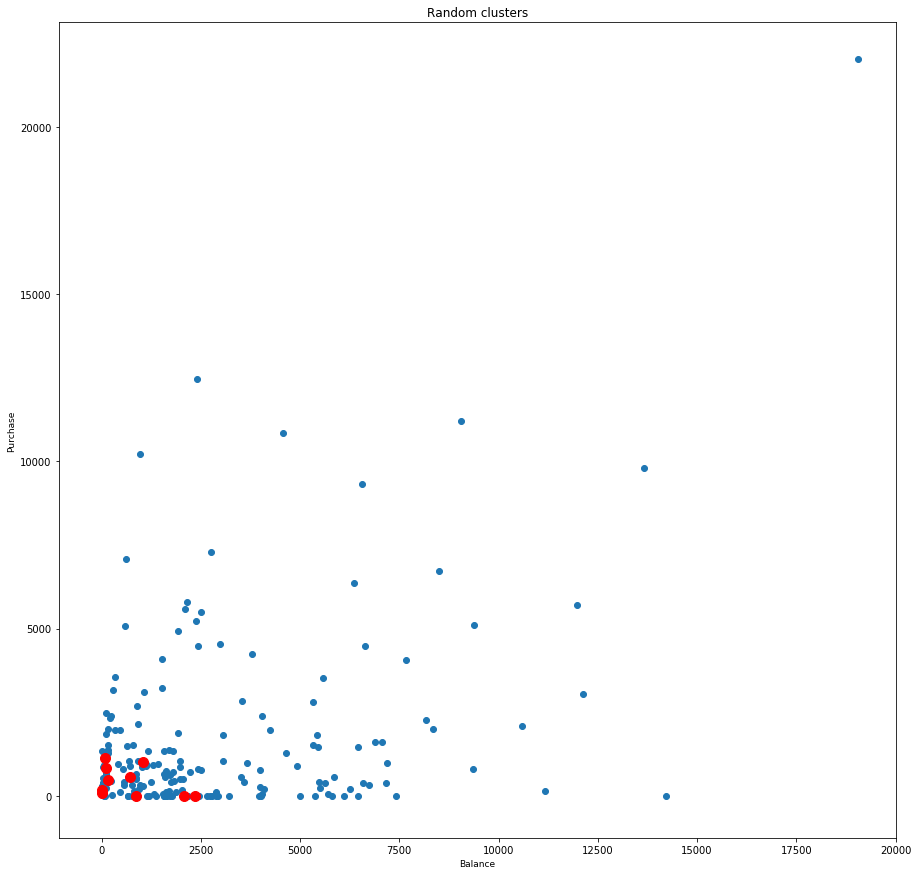

In [128]:
# let's see the initial random clusters before training 
fig = plt.figure(figsize=(15, 15))
plt.xlabel('Balance', fontsize=9)
plt.ylabel('Purchase', fontsize=9)
plt.title('Random clusters')
plt.scatter(k_means.data[:, 0][:200], k_means.data[:, 2][:200])
plt.scatter(k_means.centroids[:, 0], k_means.centroids[:, 2], c='r', s=100)
plt.show()

In [129]:
k_means.train()

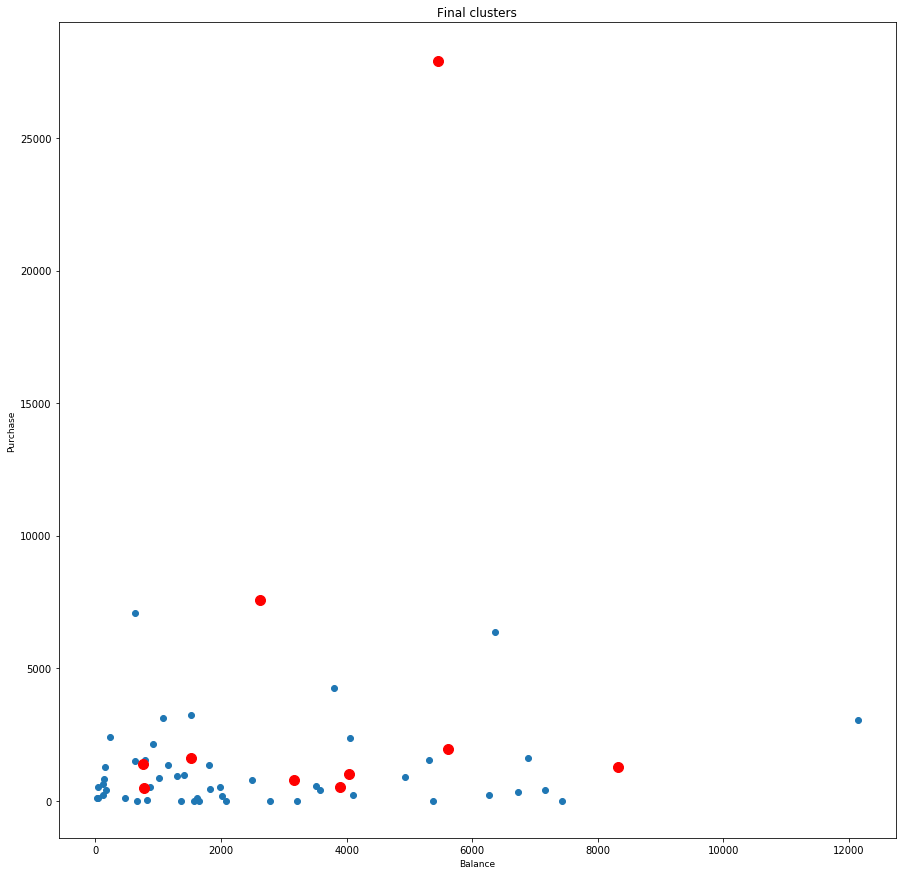

In [130]:
# Final cluster plot after training
fig = plt.figure(figsize=(15, 15))
plt.xlabel('Balance', fontsize=9)
plt.ylabel('Purchase', fontsize=9)
plt.title('Final clusters')
plt.scatter(k_means.data[:, 0][:50], k_means.data[:, 2][:50])

plt.scatter(k_means.centroids[:, 0], k_means.centroids[:, 2], c='r', s=100)
plt.show()